In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, json, csv
%matplotlib inline

move = 'Wrist_flexion_zach'
#move = 'Hand_open'
index = 25


os.chdir("/home/zackb/Synapse/ml_myo/full_raw_dataset/")
listfile = os.listdir(move)
listfile.sort()
print(listfile[index])
with open(move+'/'+listfile[index]) as tmp_file:
    data_json = json.load(tmp_file)
    data = data_json['emg']['data']
    raw_timestamps = data_json['emg']['timestamps']
    

    #normalize timestamps
    t_zero = int(raw_timestamps[0]); timestamps = []
    for tstmp  in raw_timestamps:
        timestamps.append(int(tstmp) - t_zero)
        
    emg = [[],[],[],[],[],[],[],[]]; chan = 0
    for chan in range(0,8):
        for emg_chan in data:
            emg[chan].append(emg_chan[chan])
    print(len(emg[0]))

wrist_flexion_3_25.json
732


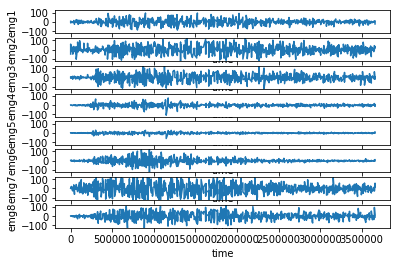

In [2]:
channels= [0,1,2,3,4,5,6,7]
#channels=[2]
num_plot = len(channels)
fig, emgaxs = plt.subplots(num_plot, 1)
if num_plot >1:
    for chan in channels:
        emgaxs[chan].plot(timestamps, emg[chan])
        emgaxs[chan].set_ylim(-125,125)
        xlabel = 'emg'+str(chan+1)
        emgaxs[chan].set_ylabel(xlabel)
        emgaxs[chan].set_xlabel('time')
else:
    emgaxs.plot(timestamps, emg[channels[0]])
    emgaxs.set_ylim(-125,125)
    xlabel = 'emg'+str(channels[0]+1)
    emgaxs.set_ylabel(xlabel)
    emgaxs.set_xlabel('time')


In [3]:
import pprint as pp
# RMS ploting
rms_width = 25; index =0
emg_rms= [[],[],[],[],[],[],[],[]];
for index in range(0, len(data), 25):
    for chan in range(0, 8):
        if index+rms_width <= len(data):
            y = np.array(emg[chan][index:index+rms_width])
            #calculate RMS val in a 125 ms time interval
            emg_rms[chan].append(np.sqrt(np.mean(y**2)))
        #the mean of a single value is NaN, not wanted
        elif len(data)%rms_width <= 4:
            pass
        else:
            y = np.array(emg[chan][index:len(data)-1])
            #calculate RMS val in a 125 ms time interval
            emg_rms[chan].append(np.sqrt(np.mean(y**2)))



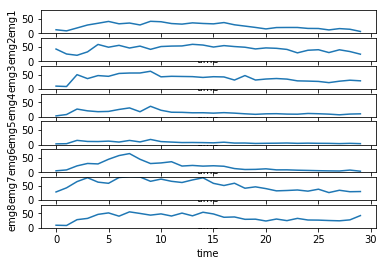

In [4]:
#RMS ploting
n_rms_in = int(len(data)/rms_width+1)
if(n_rms_in != len(emg_rms[0])):
    n_rms_in -=1
time_rms = range(n_rms_in)

channels= [0,1,2,3,4,5,6,7]
#channels= [1,2,6,7]
num_plot = len(channels)
fig, emgaxs = plt.subplots(num_plot, 1)
if num_plot >1:
    plt_n = 0
    for chan in channels:
        emgaxs[plt_n].plot(time_rms, emg_rms[chan])
        emgaxs[plt_n].set_ylim(0,80)
        xlabel = 'emg'+str(chan+1)
        emgaxs[plt_n].set_ylabel(xlabel)
        emgaxs[plt_n].set_xlabel('time')
        plt_n +=1
else:
    print(emg_rms[channels[0]])
    emgaxs.plot(time_rms, emg_rms[channels[0]])
    emgaxs.set_ylim(0,80)
    xlabel = 'emg'+str(channels[0]+1)
    emgaxs.set_ylabel(xlabel)
    emgaxs.set_xlabel('time')

[27.949955277245078, 42.21516315259246, 63.792476045377015, 77.15179842362717, 61.90379632946593, 57.90267696747707, 77.79948585948368, 80.94640202010217, 79.73129874773143, 64.79135744835109, 72.45357134054885, 64.79876542033807, 60.66234416835538, 69.56148359544957, 76.92593840831583, 57.708578218493656, 50.274844604434136, 58.145679117196664, 40.85094858139772, 45.65522971139232, 39.50544266300531, 31.769796977632705, 33.01393645114136, 34.763774248490336, 30.74605665772442, 37.52012793155162, 25.769749707748424, 33.82779921898556, 28.77081854935657, 29.402380855978315]
max :29


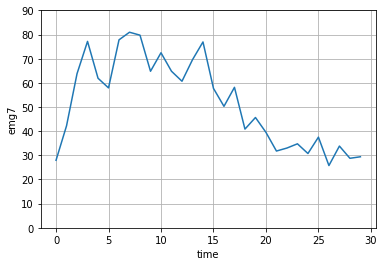

In [8]:
#RMS ploting
n_rms_in = int(len(data)/rms_width+1)
if(n_rms_in != len(emg_rms[0])):
    n_rms_in -=1
time_rms = range(n_rms_in)

#channels= [0,1,2,3,4,5,6,7]
channels = [6]
num_plot = len(channels)
fig, emgaxs = plt.subplots(num_plot, 1)
if num_plot >1:
    for chan in channels:
        emgaxs[chan%num_plot].plot(time_rms, emg_rms[chan])
        emgaxs[chan%num_plot].set_ylim(0,80)
        xlabel = 'emg'+str(chan+1)
        emgaxs[chan%num_plot].set_ylabel(xlabel)
        emgaxs[chan%num_plot].set_xlabel('time')
else:
    print(emg_rms[channels[0]])
    emgaxs.plot(time_rms, emg_rms[channels[0]])
    emgaxs.set_ylim(0,90)
    xlabel = 'emg'+str(channels[0]+1)
    emgaxs.set_ylabel(xlabel)
    emgaxs.set_xlabel('time')
    emgaxs.grid(True)

print("max :"+ str(len(emg_rms[channels[0]])-1))

In [749]:
emg_rms[channels[0]].index(19.98199189270179)

ValueError: 19.98199189270179 is not in list